# Feature encoding
# writing categorical data in to numerical data

# Feature encoding is the process of converting categorical data (text or labels) into a numerical format so that it can be used in machine learning algorithms

# 1. Label Encoding

Assigns a unique integer to each category.

In [1]:
import pandas as pd

# Example DataFrame
data = {'Color': ['Red', 'Blue', 'Green', 'Blue']}
df = pd.DataFrame(data)

# Label Encoding
df['Color_Label'] = df['Color'].astype('category').cat.codes
print(df)


   Color  Color_Label
0    Red            2
1   Blue            0
2  Green            1
3   Blue            0


# 2. One-Hot Encoding

Creates a binary column for each category and assigns 1 if the category is present.

In [6]:
# One-Hot Encoding convert the data if its in boolean othewise it will show true/false instead of 0 and 1
import pandas as pd

# Example DataFrame
data = {'Color': ['Red', 'Blue', 'Green', 'Blue']}
df = pd.DataFrame(data)

# One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['Color'], dtype=int)  # Force integer values (0/1)
print(df_one_hot)


   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           1            0          0
2           0            1          0
3           1            0          0


# 3. Ordinal Encoding

Assigns integers based on a specific order (useful for ordinal data).

In [3]:
# Ordinal Encoding
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_ordinal = pd.DataFrame({'Priority': ['Low', 'Medium', 'High', 'Low']})
df_ordinal['Priority_Ordinal'] = df_ordinal['Priority'].map(ordinal_mapping)
print(df_ordinal)


  Priority  Priority_Ordinal
0      Low                 1
1   Medium                 2
2     High                 3
3      Low                 1


# 4. Frequency Encoding

Encodes categories based on their frequency in the data.

In [4]:
# Frequency Encoding
freq_encoding = df['Color'].value_counts(normalize=True)
df['Color_Freq'] = df['Color'].map(freq_encoding)
print(df)


   Color  Color_Label  Color_Freq
0    Red            2        0.25
1   Blue            0        0.50
2  Green            1        0.25
3   Blue            0        0.50


5. Target Encoding

Uses the mean of the target variable for each category.

In [5]:
# Example DataFrame with a target column
df_target = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue'], 'Target': [1, 0, 1, 1]})

# Target Encoding
target_mean = df_target.groupby('Color')['Target'].mean()
df_target['Color_Target_Mean'] = df_target['Color'].map(target_mean)
print(df_target)


   Color  Target  Color_Target_Mean
0    Red       1                1.0
1   Blue       0                0.5
2  Green       1                1.0
3   Blue       1                0.5


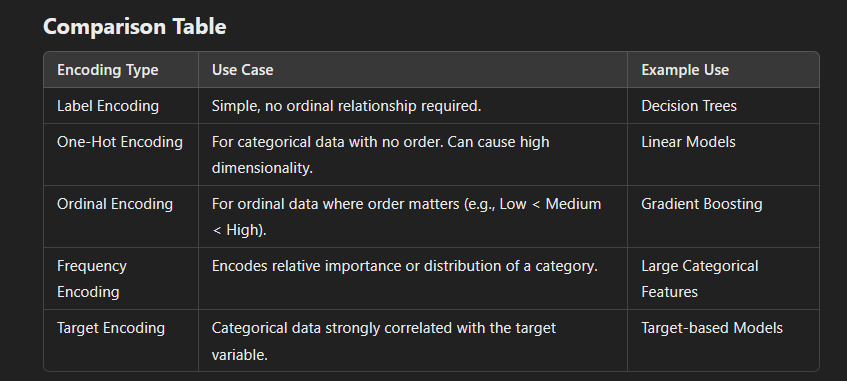
Which to Use?

    Use One-Hot Encoding for models sensitive to numerical relationships (e.g., linear regression).
    Use Label Encoding or Ordinal Encoding when categorical values are ordinal or for tree-based models.
    Use Frequency Encoding or Target Encoding when dealing with large cardinality or when the target variable matters.

By selecting the right encoding method, you can enhance the performance and interpretability of your model!

# Use titanic dataset 

In [7]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# 1. Label Encoding

In [8]:
# Label Encoding for the 'sex' column
df['Sex_Label'] = df['sex'].astype('category').cat.codes
print(df[['sex', 'Sex_Label']].head())


      sex  Sex_Label
0    male          1
1  female          0
2  female          0
3  female          0
4    male          1


# 2. One-Hot Encoding

In [16]:
# Access specific one-hot encoded columns convert dataset in to integer
print(df_one_hot[['Class_First', 'Class_Second', 'Class_Third']].head())


   Class_First  Class_Second  Class_Third
0        False         False         True
1         True         False        False
2        False         False         True
3         True         False        False
4        False         False         True


In [19]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Apply One-Hot Encoding to the 'class' column with integer dtype
df_one_hot = pd.get_dummies(df, columns=['class'], prefix='Class', dtype=int)

# Display the first few rows of the one-hot encoded columns
print(df_one_hot[['Class_First', 'Class_Second', 'Class_Third']].head())


   Class_First  Class_Second  Class_Third
0            0             0            1
1            1             0            0
2            0             0            1
3            1             0            0
4            0             0            1


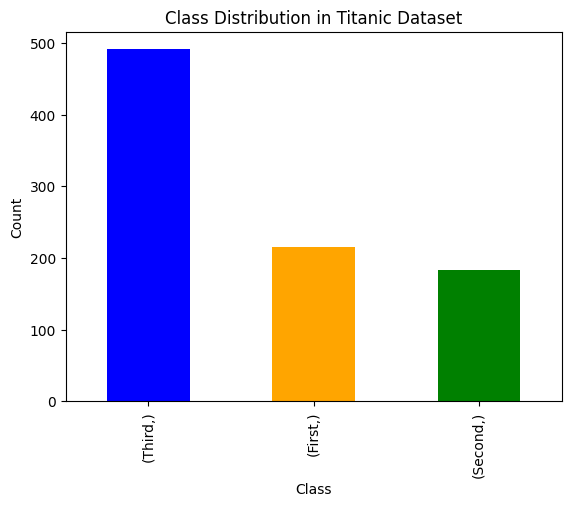

In [18]:
import matplotlib.pyplot as plt

# Count the number of rows in each class
class_counts = df[['class']].value_counts()

# Plot the distribution
class_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Class Distribution in Titanic Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# 3. Ordinal Encoding  Assume embark_town has an ordinal nature (e.g., "Southampton" < "Cherbourg" < "Queenstown").

In [11]:
# Define the order
ordinal_mapping = {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3}

# Ordinal Encoding
df['Embark_Town_Ordinal'] = df['embark_town'].map(ordinal_mapping)
print(df[['embark_town', 'Embark_Town_Ordinal']].head())


   embark_town  Embark_Town_Ordinal
0  Southampton                  1.0
1    Cherbourg                  2.0
2  Southampton                  1.0
3  Southampton                  1.0
4  Southampton                  1.0


# 4. Frequency Encoding

In [12]:
# Frequency Encoding for the 'embark_town' column
freq_encoding = df['embark_town'].value_counts(normalize=True)
df['Embark_Town_Freq'] = df['embark_town'].map(freq_encoding)
print(df[['embark_town', 'Embark_Town_Freq']].head())


   embark_town  Embark_Town_Freq
0  Southampton          0.724409
1    Cherbourg          0.188976
2  Southampton          0.724409
3  Southampton          0.724409
4  Southampton          0.724409


# 5.  Target Encoding
We'll use sex as the categorical feature and survived as the target.

In [13]:
# Target Encoding for the 'sex' column
target_mean = df.groupby('sex')['survived'].mean()
df['Sex_Target_Encoding'] = df['sex'].map(target_mean)
print(df[['sex', 'Sex_Target_Encoding']].head())


      sex  Sex_Target_Encoding
0    male             0.188908
1  female             0.742038
2  female             0.742038
3  female             0.742038
4    male             0.188908


# Comparison Plots

# We can visualize some of these encodings to compare their results

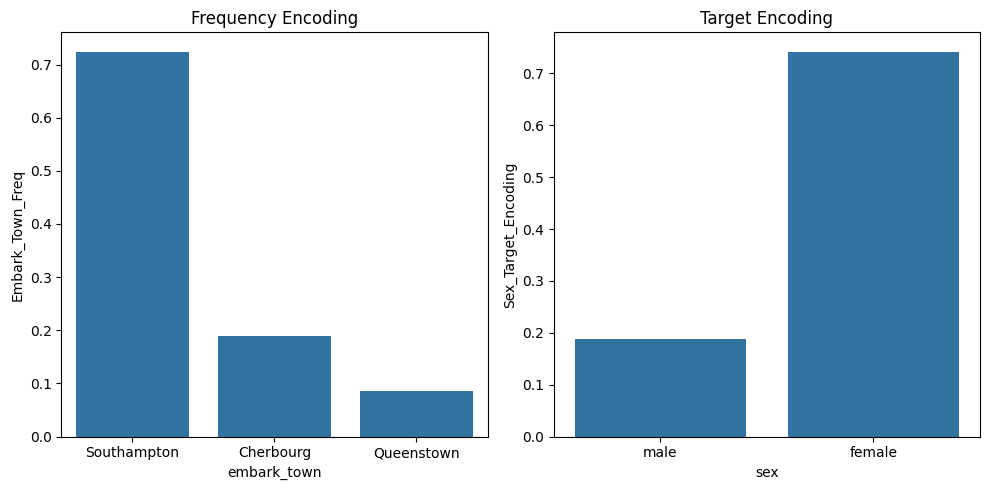

In [14]:
import matplotlib.pyplot as plt

# Frequency Encoding vs Target Encoding for embark_town
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df['embark_town'], y=df['Embark_Town_Freq'])
plt.title('Frequency Encoding')

plt.subplot(1, 2, 2)
sns.barplot(x=df['sex'], y=df['Sex_Target_Encoding'])
plt.title('Target Encoding')

plt.tight_layout()
plt.show()


# Key Results

    Label Encoding: Encodes categories with unique integers.
    One-Hot Encoding: Converts categories into binary columns.
    Ordinal Encoding: Assigns a specific order to categories.
    Frequency Encoding: Captures the relative distribution of categories.
    Target Encoding: Encodes based on the relationship between the feature and the target.